# Reporting dashboard
## A prototype

In [1]:
import matplotlib.pyplot as plt
from datetime import date
from IPython.display import display

import src.compute.changelogs as changelogs
from src.compute.utils import Interval
from src.db.utils import SnowflakeWrapper

conn = SnowflakeWrapper.create_snowflake_connection()
sw = SnowflakeWrapper(conn)

First, we need to define an interval in which we will operate:

In [2]:
active_interval: Interval = Interval(
    fromDate=date(2019, 10, 1), # year, month, day
    toDate=date(2020, 1, 1)
)

Number of actions on the given interval

In [3]:
active_cards: int = changelogs.unique_active_cards(sw, interval=active_interval)
print(f"Cards active in the interval {active_interval}: {active_cards}")

Cards active in the interval ('2019-10-01', '2020-01-01'): 2969


In [4]:
print(f"Most frequent transitions in the interval:")
most_frequent = changelogs.transition_frequency(sw, interval=active_interval, limit=10, order="DESC")
display(most_frequent)

Most frequent transitions in the interval:


,Transition,TotalTransitions
0,Ready for dev -> Development,480
1,Development -> Code review,450
2,Code review -> Testing,430
3,In Backlog -> Cancelled,398
4,Testing -> Master,380
5,Master -> Live,364
6,Code review -> Needs CR fixes,277
7,Pending Review -> Review,275
8,Needs CR fixes -> Code review,267
9,Review -> Ready for dev,256


In [5]:
print(f"Least frequent transitions in the interval:")
least_frequent = changelogs.transition_frequency(sw, interval=active_interval, limit=10, order="ASC")
display(least_frequent)

Least frequent transitions in the interval:


,Transition,TotalTransitions
0,On Hold -> Done,1
1,Done -> Testing,1
2,Cancelled -> To-Do,1
3,Done -> Work in Progress,1
4,Ready for dev -> On Hold,1
5,To-Do -> Spec design,1
6,Needs QA fixes -> Testing On Hold,1
7,On Hold -> Development Backlog,1
8,Needs SR feedback -> Cancelled,1
9,In Backlog -> Pending Review,1


In [6]:
print(f"Most frequent transitions in the interval, by week:")
most_frequent_week = changelogs.transition_frequency(sw, interval=active_interval, limit=-1, by_week=True, order="ASC")
display(most_frequent_week)

Most frequent transitions in the interval, by week:


,weekOfYear,Transition,TotalTransitions
0,1,Product review -> Code review,1
1,1,To-Do -> Work in Progress,1
2,1,Testing -> Master,3
3,1,Code review -> Needs CR fixes,1
4,1,In Backlog -> Spec design,1
...,...,...,...
770,52,Code review -> Done,1
771,52,Development -> Product review,1
772,52,Ready for dev -> Review,1
773,52,Development Backlog -> Ready for dev,1


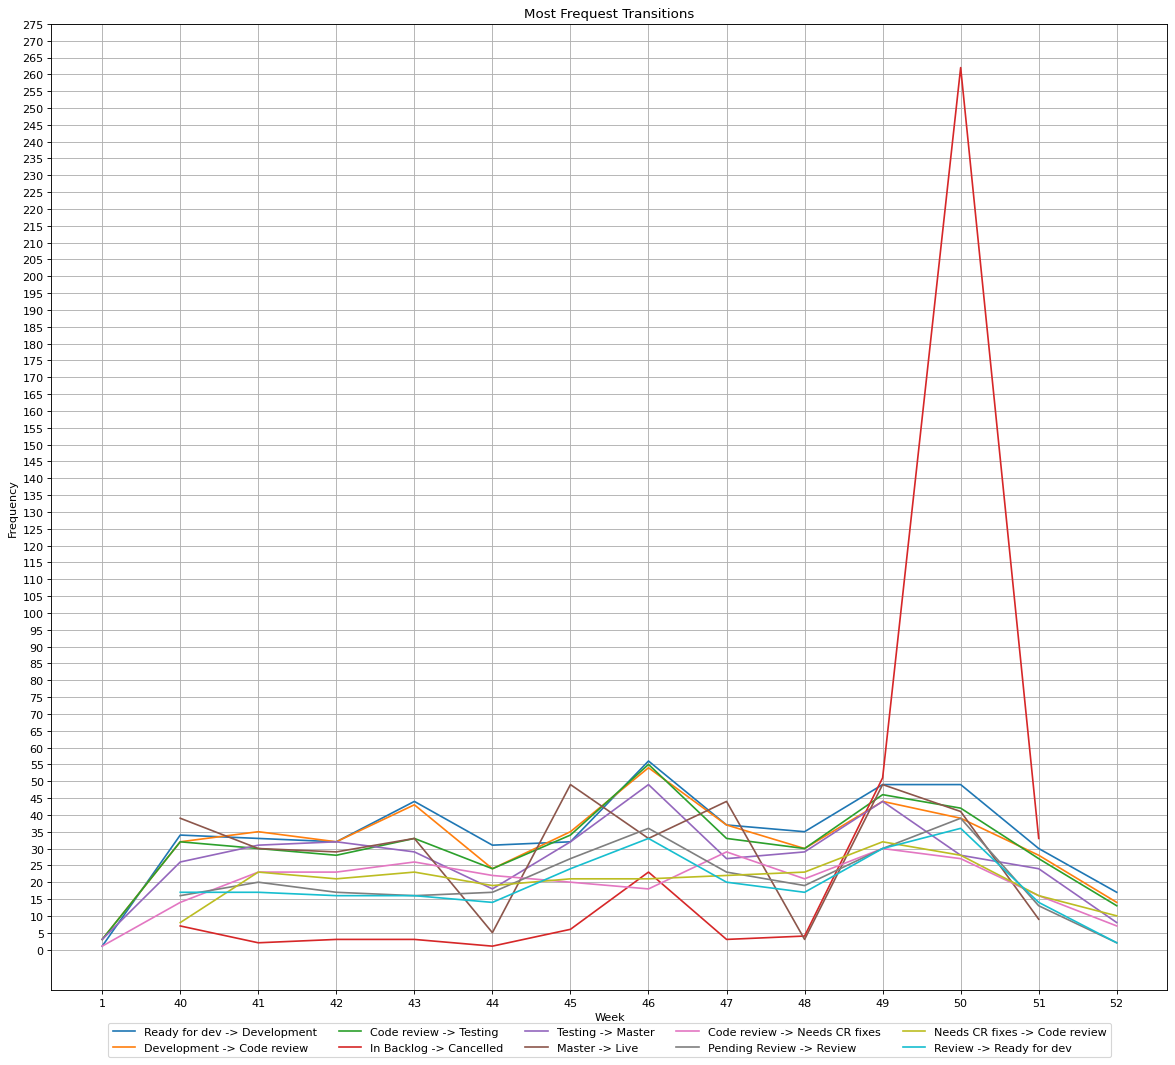

In [7]:
fig, ax = plt.subplots(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for _, row in most_frequent.iterrows():
    data = most_frequent_week[most_frequent_week["Transition"].isin([row["Transition"]])]
    x_data = data["weekOfYear"]
    y_data = data["TotalTransitions"]
    ax.plot(x_data, y_data, label=row["Transition"])

ax.set_xlabel("Week")
ax.set_ylabel("Frequency")
ax.set_title("Most Frequest Transitions")
ax.grid()
ax.set_yticks(range(0, 280, 5), minor=False)
cols = int(len(most_frequent)/2)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.075), ncol=cols)